In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


train_data = pd.read_csv('train_data.txt', sep=':::', names=['movie','genre', 'plot'])
test_data = pd.read_csv('test_data.txt', sep=':::', names=['movie','plot'])


C:\Users\rachi\AppData\Local\Temp\ipykernel_2692\3614994732.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('train_data.txt', sep=':::', names=['movie','genre', 'plot'])
C:\Users\rachi\AppData\Local\Temp\ipykernel_2692\3614994732.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('test_data.txt', sep=':::', names=['movie','plot'])


In [2]:
train_data.head(5)

,movie,genre,plot
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_data.head(5)

,movie,plot
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train_data.drop_duplicates(inplace=True)
print(train_data)

                                              movie          genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                                    plot  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

In [5]:
test_data.drop_duplicates(inplace=True)
print(test_data)

                                  movie  \
1                 Edgar's Lunch (1998)    
2             La guerra de papá (1977)    
3          Off the Beaten Track (2010)    
4               Meu Amigo Hindu (2015)    
5                    Er nu zhai (1955)    
...                                 ...   
54196   "Tales of Light & Dark" (2013)    
54197      Der letzte Mohikaner (1965)    
54198              Oliver Twink (2007)    
54199                Slipstream (1973)    
54200        Curitiba Zero Grau (2010)    

                                                    plot  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn't spoken with hi...  
5       Before he was known internationally as a mart...  
...                                                  ...  
54196   Covering multiple genres, Tales of Light & Da...  
54197   As 

In [6]:
# Set to a lower number like 3000 or 1000
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Transform training and test data
X = tfidf.fit_transform(train_data['plot'])
X_test = tfidf.transform(test_data['plot'])

# Print shapes to verify
print("Train TF-IDF shape:", X.shape)
print("Test TF-IDF shape:", X_test.shape)


Train TF-IDF shape: (54214, 3000)
Test TF-IDF shape: (54200, 3000)


In [7]:
print(train_data.shape)            # Should be (54214, x)
print(train_data['genre'].shape)   # Should be (54214,)


(54214, 3)
(54214,)


In [8]:
# Encode genres (full column — no unique())
le = LabelEncoder()
y = le.fit_transform(train_data['genre'])
y

array([ 8, 24,  1, ...,  7,  5, 12])

In [9]:
print("X shape:", X.shape)    # (54214, N)
print("y shape:", y.shape)    # (54214,)


X shape: (54214, 3000)
y shape: (54214,)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=le.classes_))


               precision    recall  f1-score   support

      action        0.48      0.23      0.31       263
       adult        0.66      0.21      0.31       112
   adventure        0.40      0.14      0.20       139
   animation        0.58      0.11      0.18       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.57      0.54      1443
       crime        0.20      0.02      0.03       107
 documentary        0.67      0.84      0.74      2659
       drama        0.54      0.77      0.63      2697
      family        0.43      0.08      0.13       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.50      0.66        40
     history        0.00      0.00      0.00        45
      horror        0.61      0.53      0.57       431
       music        0.63      0.50      0.56       144
     musical        1.00      0.04      0.08        50
     mystery        1.00      0.04      0.07        56
        n

C:\ProgramData\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
test_preds = model.predict(X_test)
test_data['predicted_genre'] = le.inverse_transform(test_preds)
test_preds

array([5, 8, 7, ..., 5, 8, 7])

In [13]:
test_data[['movie', 'predicted_genre']].to_csv('submission.csv', index=False)
test_data

,movie,plot,predicted_genre
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",comedy
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
5,Er nu zhai (1955),Before he was known internationally as a mart...,drama
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",drama
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,action
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,comedy
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",drama


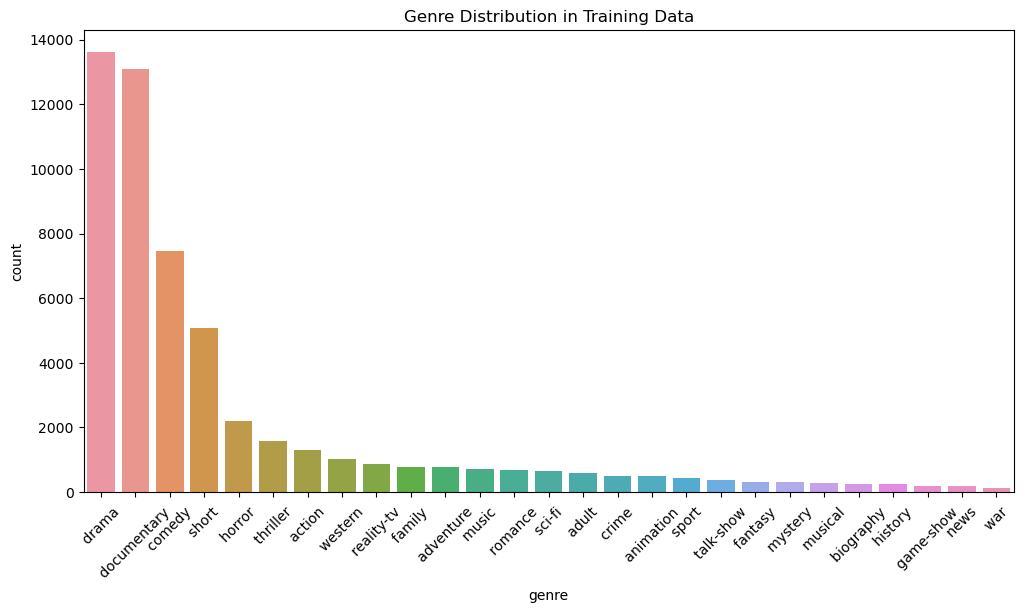

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='genre', order=train_data['genre'].value_counts().index)
plt.title("Genre Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()


In [15]:
genre_to_check = "Action"  # Change this to any genre like "Comedy", "Drama", etc.

# Filter rows where genre matches
filtered = train_data[train_data['genre'] == genre_to_check]

if not filtered.empty:
    genre_tfidf = tfidf.transform(filtered['plot'])
    mean_tfidf = genre_tfidf.mean(axis=0).A1  # Get average TF-IDF score
    feature_names = tfidf.get_feature_names_out()

    # Get top 20 words
    top_indices = mean_tfidf.argsort()[::-1][:20]
    top_words = [feature_names[i] for i in top_indices]

    # Plot them
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_tfidf[top_indices], y=top_words)
    plt.title(f"Top 20 TF-IDF Words in '{genre_to_check}' Genre")
    plt.show()
else:
    print(f"No plots found for genre: {genre_to_check}")


No plots found for genre: Action
